<a href="https://colab.research.google.com/github/akaicomet/NJOITOpenDataCenter-Pension-Record/blob/master/NJOITOpenDataCenter_Pension_Record_DataPreparation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pandas
!pip install tqdm
!pip install scikit-learn
!pip install sodapy
!pip install matplotlib
!pip install hyperopt
!pip install bayesian-optimization
!pip install tbvaccine 
!pip install MulticoreTSNE

    100% |████████████████████████████████| 61kB 5.4MB/s 
    100% |████████████████████████████████| 829kB 19.6MB/s 
  Running setup.py bdist_wheel for future ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built future
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
google-colab 0.0.1a1 has requirement requests~=2.18.0, but you'll have requests 2.21.0 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
      Successfully uninstalled requests-2.18.4
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0
  Running setup.py b

#1. Copy python files from  GItHub repository to local

In [0]:
!git clone https://github.com/akaicomet/NJOITOpenDataCenter.git
!git clone https://github.com/akaicomet/akaicomet_Utility.git
!git clone https://github.com/akaicomet/akaicomet_Chart.git
!git clone https://github.com/akaicomet/akaicomet_ML.git

Cloning into 'NJOITOpenDataCenter'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 60 (delta 32), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (60/60), done.
Cloning into 'akaicomet_Utility'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.
Cloning into 'akaicomet_Chart'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 49 (delta 13), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (49/49), done.
Cloning into 'akaicomet_ML'...
remote: Enumerating objects: 130, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 130

#2. Run .py files in local

In [0]:
%run -i /content/akaicomet_Utility/ErrorHandling.py

%run -i /content/NJOITOpenDataCenter/YourMoneyActivePensionMembers.py 
%run -i /content/NJOITOpenDataCenter/YourMoneyRetiredPensionMembers.py
%run -i /content/NJOITOpenDataCenter/YourMoneyPensionMembersMerge.py

%run -i /content/akaicomet_Chart/X-Ray_Scan.py
%run -i /content/akaicomet_Chart/akaicomet_Chart.py

%run -i /content/akaicomet_ML/ML_Init.py
%run -i /content/akaicomet_ML/ML_Auto.py
%run -i /content/akaicomet_ML/AutoFeatureEngineering.py


#3. Import libraries

In [0]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import random
from sodapy import Socrata
#from pandas.plotting import scatter_matrix
#from datetime import datetime
import seaborn as sb
from tqdm import tqdm
import warnings
from textwrap import wrap

#4. YourMoney and the NJOIT Open Data Center 
##4.1 YourMoney Active Pension Members API

**Pension member data load from NJOIT** 

In [0]:
client = Socrata("data.nj.gov", None)
results = client.get("45bd-gwii", limit=100000000)#100000000

**Data Cleansing and Preparation for YourMoney Active Pension Members data**

In [0]:
ActivePension_df = ActivePensionDataWrangler(results)

##4.2 YourMoney Retired Pension Members API
**Pension payment member data load from NJOIT**

In [0]:
results = client.get("8up4-62p6",   limit=100000000)

**Data Cleansing and Preparation for YourMoney Retired Pension data**

In [0]:
RetiredPension_df_grped = RetiredPensionMembersDataWrangler(results)

**Merge YourMoney Active Pension Members data and YourMoney Retired Pension data**

In [0]:
ActivePension_df = PensionMembersMerge(ActivePension_df,RetiredPension_df_grped)

## 5.4 Redemensioning Data:
Apply redemensioning and scaling data to see effect of group segmentation. 

In [0]:
y_train = ActivePension_df.sample(n=1000, random_state=0)['IsPensionPaid'].as_matrix()
X_train = ActivePension_df[x_cols2].sample(n=1000, random_state=0)

#y_train = ActivePension_df['IsPensionPaid']
#X_train = ActivePension_df[x_cols2]

X_train = X_train.astype(float)
X_train = np.round(X_train, 2)

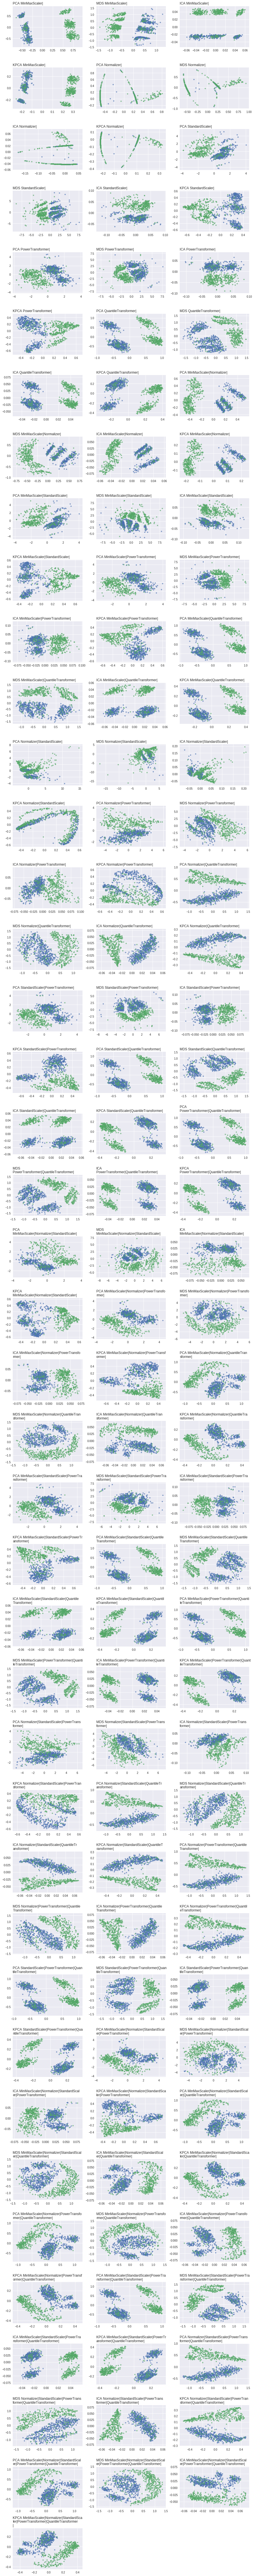

In [0]:
scaling_def = {'MinMaxScaler': MinMaxScaler(),'Normalizer': Normalizer(),'StandardScaler': StandardScaler(),'PowerTransformer':PowerTransformer(),'QuantileTransformer':QuantileTransformer()}
redemensioning_def = {'PCA': PCA(n_components=2),'MDS': MDS(n_components=2),'ICA': FastICA(n_components=2),'KPCA': KernelPCA(n_components=2, kernel='rbf')}
#redemensioning_def = {'LLE': LocallyLinearEmbedding(n_components=2,eigen_solver="dense")}

XRayChart(scaling_def,redemensioning_def, X_train, y_train)